# Forecasting:- Coca-Cola Sales Data

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\PRANAV\Desktop\lms\Forecasting\CocaCola_Sales_Rawdata.xlsx", header = 0, index_col = 0, parse_dates = True)
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


### EDA

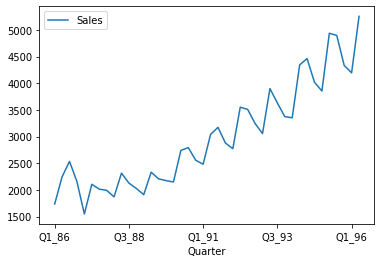

In [3]:
df.plot()
plt.show()

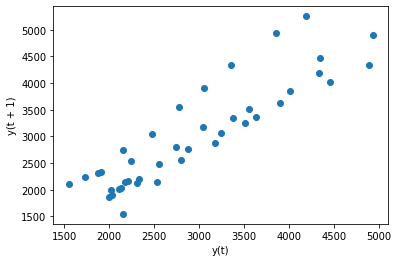

In [4]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

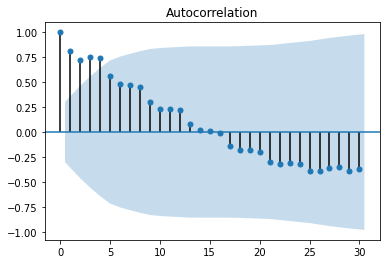

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags = 30)
plt.show()

In [6]:
Train = df.head(30)
Test = df.tail(12)

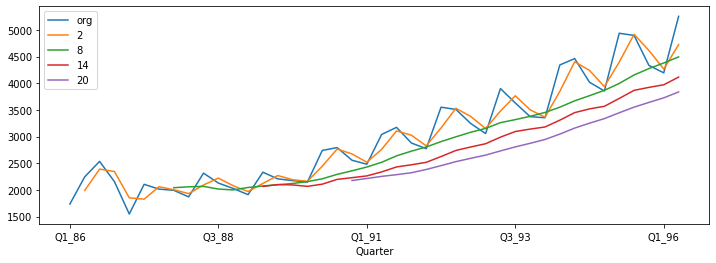

In [7]:
plt.figure(figsize = (12,4))
df['Sales'].plot(label = 'org')
for i in range(2, 24, 6):
    df['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

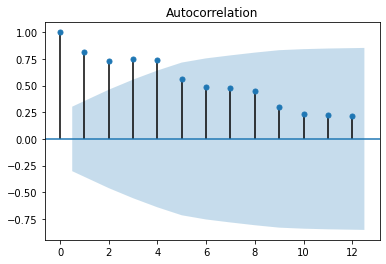

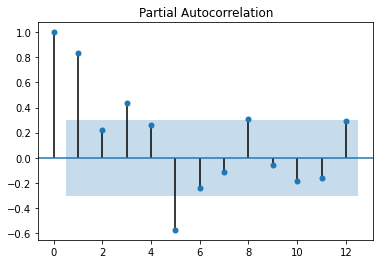

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales, lags = 12)
tsa_plots.plot_pacf(df.Sales, lags = 12)
plt.show()

In [9]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/ org)*100
    return np.mean(temp)

In [10]:
def RMSE(pred):
    rmse = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred))**2))
    return rmse

In [11]:
# Simple Exponential Model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
cokes = pd.read_excel(r"C:\Users\PRANAV\Desktop\lms\Forecasting\CocaCola_Sales_Rawdata.xlsx")
train = cokes.head(30)
test = cokes.tail(12)
start = test.index[0]
end = test.index[-1]
ses_model = SimpleExpSmoothing(train.Sales).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = start, end = end)
print('The MAPE value is:', MAPE(pred_ses, test.Sales))
print('The RMSE value is:', RMSE(pred_ses))

The MAPE value is: 22.046763337847036
The RMSE value is: 1153.7031585725247


C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [12]:
# Holt model
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(train.Sales).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = start, end = end)
print('MAPE value is :', MAPE(pred_hw, test.Sales))
print('RMSE value is :', RMSE(pred_hw))

MAPE value is : 11.213841942210799
RMSE value is : 559.5201160476229


C:\Users\PRANAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Holt's winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model_add_add = ExponentialSmoothing(train.Sales, seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
pred_hw_add_add = hw_model_add_add.predict(start = start, end = end)
print('MAPE value is:', MAPE(pred_hw_add_add, test.Sales))
print('RMSE value is:', RMSE(pred_hw_add_add))

MAPE value is: 8.12807829723476
RMSE value is: 430.8717109447752


In [14]:
# Holt's Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_model_mul_add = ExponentialSmoothing(train.Sales, seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = start, end = end)
print('MAPE value is:', MAPE(pred_hw_mul_add, test.Sales))
print('RMSE value is :', RMSE(pred_hw_mul_add))

MAPE value is: 4.720920831309321
RMSE value is : 229.22013490109993


In [15]:
final_model = ExponentialSmoothing(cokes.Sales, seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
final_model.forecast(12)

42    4967.857635
43    4824.914655
44    4854.882298
45    5646.763469
46    5670.139152
47    5327.627171
48    5235.660441
49    6085.465535
50    6021.283069
51    5685.730258
52    5597.884028
53    6393.316101
dtype: float64

In [18]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
import six
import sys
sys.modules['sklearn.externals.six'] = six

from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Sales'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, 
                          seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)
stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=408.814, BIC=415.651, Fit time=1.538 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=403.610, BIC=406.345, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=407.576, BIC=413.045, Fit time=0.553 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=407.143, BIC=412.612, Fit time=1.010 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=405.585, BIC=409.687, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=405.580, BIC=409.682, Fit time=0.054 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=407.577, BIC=413.046, Fit time=0.118 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=405.600, BIC=409.702, Fit time=0.102 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=405.486, BIC=409.588, Fit time=0.085 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -199.805
Date:                            Fri, 09 Apr 2021   AIC                            403.610
Time:                                    12:57:16   BIC                            406.345
Sample:                                         0   HQIC                           404.467
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.6284     44.863      0.906      0.365     -47.301     128.558
sigma2      5.649e+04   1.74e+04      3.237      0.001    2.23e+04    9.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.88   Prob(JB):                         0.76
Heteroskedasticity (H):               0.55   Skew:                             0.22
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  
import warnings
warnings.filterwarnings("ignore")
model = SARIMAX(train['Sales'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -117.493
Date:                            Fri, 09 Apr 2021   AIC                            244.986
Time:                                    12:57:20   BIC                            249.152
Sample:                                         0   HQIC                           245.400
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0877      0.270      0.325      0.745      -0.441       0.617
ar.S.L12       0.5481      7.512      0.073      0.942     -14.176      15.272
ar.S.L24       0.4496      7.307      0.062      0.951     -13.872      14.771
ma.S.L12      -1.0000      5.253     -0.190      0.849     -11.295       9.295
sigma2      5.176e+04      0.000   4.56e+08      0.000    5.18e+04    5.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.72   Prob(JB):                         0.84
Heteroskedasticity (H):               0.41   Skew:                             0.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.34e+25. Standard errors may be unstable.
"""

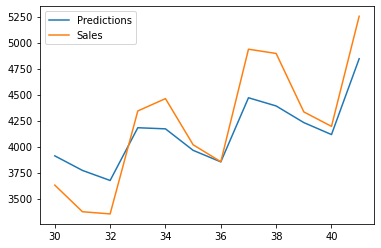

In [20]:
predictions = result.predict(start = test.index[0], end = test.index[-1], typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [21]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(test["Sales"], predictions)
mean_squared_error(test["Sales"], predictions)

92540.15272249299

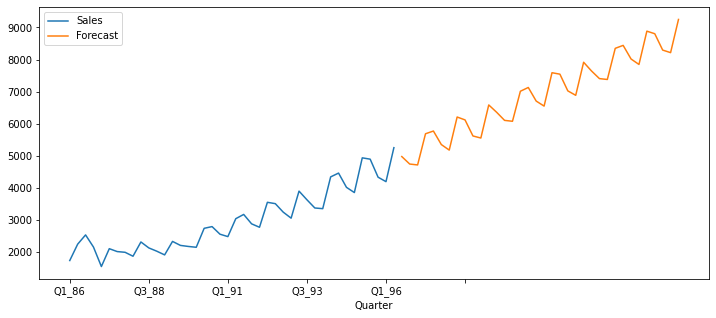

In [22]:
model = model = SARIMAX(df['Sales'], order = (0, 1, 1), seasonal_order = (2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(df), end = (len(df)-1) + 3 * 12, typ = 'levels').rename('Forecast')
df['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [23]:
forecast.head(12)

42    4975.970381
43    4742.765426
44    4715.066643
45    5686.803231
46    5771.667901
47    5350.210280
48    5177.730593
49    6208.661028
50    6118.316769
51    5618.090916
52    5553.689141
53    6585.089367
Name: Forecast, dtype: float64

In [24]:
RMSE(predictions)

304.204130022084

In [25]:
MAPE(predictions, test.Sales)

6.045100143130899

In [26]:
data = {'MODEL': pd.Series(['rmse_Simple_Exponential', 'rmse_Holts', 'rmse_holts_winter_add_add', 'rmse_holts_winter_mul_add', 'rmse_ARIMA']), 
        "rmse_values":pd.Series([RMSE(pred_ses), RMSE(pred_hw), RMSE(pred_hw_add_add), RMSE(pred_hw_mul_add), RMSE(predictions)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['rmse_values'])

,MODEL,rmse_values
3,rmse_holts_winter_mul_add,229.220135
4,rmse_ARIMA,304.204130
2,rmse_holts_winter_add_add,430.871711
1,rmse_Holts,559.520116
0,rmse_Simple_Exponential,1153.703159


In [27]:
data = {'MODEL': pd.Series(['MAPE_Simple_Exponential', 'MAPE_Holts', 'MAPE_holts_winter_add_add', 'MAPE_holts_winter_mul_add', 'MAPE_ARIMA']), 
        "MAPE_values":pd.Series([MAPE(pred_ses,test.Sales), MAPE(pred_hw,test.Sales), MAPE(pred_hw_add_add,test.Sales), MAPE(pred_hw_mul_add,test.Sales), MAPE(predictions, test.Sales)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

,MODEL,MAPE_values
3,MAPE_holts_winter_mul_add,4.720921
4,MAPE_ARIMA,6.045100
2,MAPE_holts_winter_add_add,8.128078
1,MAPE_Holts,11.213842
0,MAPE_Simple_Exponential,22.046763


In [28]:
# From the above table we can conclude that the Holt's Winter Exponential Smoothing with additive seasonality and trend model is best suitable for the Coca-Cola Data